In [47]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [49]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported', ylabel='count'>

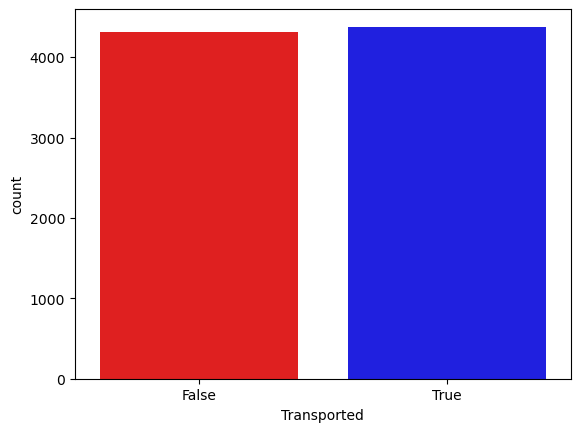

In [51]:
#analyze the difference between the two transported figures
sns.countplot(x='Transported',data=train,palette=['r','b'])

In [52]:
#check how many null values are present in each column
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [53]:
#replace the numerical features with mean and categorical with mode
train['Age']=train['Age'].fillna(train['Age'].mean())
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP']=train['VIP'].fillna(train['VIP'].mode()[0])
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])

In [54]:
#double check to see all values are filled in except name
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [55]:
#Since cabin can be split by Port and Starboard
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
train['Cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [56]:
df1=train
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [57]:
#Then convert all destination-based features and categories into numbers by assigning a number to each output
df1.HomePlanet=df1.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
df1.Cabin_side=df1.Cabin_side.map({'P':0,'S':1})
df1.Destination=df1.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [58]:
#True-False converts into 1 & 2
df1["CryoSleep"].replace(False,0,inplace=True)
df1["CryoSleep"].replace(True,1,inplace=True)
df1["VIP"].replace(False,0,inplace=True)
df1["VIP"].replace(True,1,inplace=True)
df1["Transported"].replace(False,0,inplace=True)
df1["Transported"].replace(True,1,inplace=True)

In [59]:
#Drop unwanted columns
df1=train.drop(['Name','Cabin'],axis=1)

In [60]:
#ensure all categories are numerical
df1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


<Axes: >

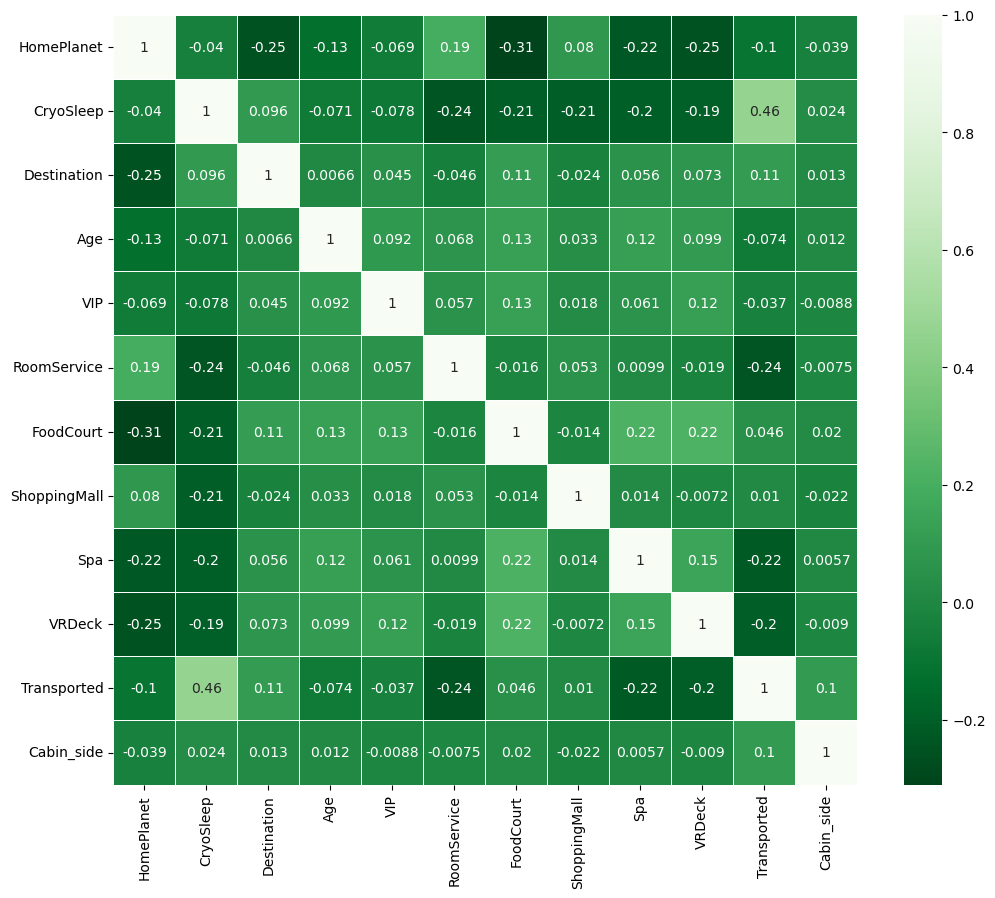

In [61]:
#correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,linewidth=0.4,cmap='Greens_r')

In [62]:
df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_side      0
dtype: int64

In [63]:
#spliting the model and setting it up
X=df1.drop(['Transported'],axis=1)
y=df1['Transported']

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600,max_depth=18,random_state=42,min_samples_leaf=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=4, n_estimators=600,
                       random_state=42)

In [66]:
from sklearn.metrics import accuracy_score
#find the accuracy of the prediction for the X_val

prediction = rfc.predict(X_val)
accuracy = accuracy_score(y_val,prediction)
print((accuracy_score(y_val,prediction)))

0.8021851638872916


In [67]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [68]:
#checking the # of null values in the dataset
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [69]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())

In [70]:
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])

In [71]:
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])
test['Cabin_side'].unique()

array(['S', 'P'], dtype=object)

In [72]:
test.HomePlanet=test.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
test.Cabin_side=test.Cabin_side.map({'P':0,'S':1})
test.Destination=test.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [73]:
test["CryoSleep"].replace(False,0,inplace=True)
test["CryoSleep"].replace(True,1,inplace=True)
test["VIP"].replace(False,0,inplace=True)
test["VIP"].replace(True,1,inplace=True)

In [74]:
test_df=test.drop(['Name','Cabin'],axis=1)

In [75]:
#final_df
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,0013_01,1,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,1,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1
2,0019_01,0,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,0,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,1,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1


In [76]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_side      0
dtype: int64

In [77]:
pred_final=rfc.predict(test_df)

In [78]:
a=test_df['PassengerId']
x=pd.DataFrame(a)
b=pred_final
y=pd.DataFrame(b)

In [79]:
final=pd.concat([x,y],axis=1)
final.replace(0,False,inplace=True)
final.replace(1,True,inplace=True)
final.rename(columns={0:'Transported'},inplace=True)
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [80]:
final.to_csv('spaceship_titanic.csv',index=False)